In [7]:
import qiskit as q

%matplotlib inline

circuit = q.QuantumCircuit(2,2) #2 qubits and 2 classical bits 

#currently: 0,0 
circuit.x(0)

#1,0 
circuit.cx(0,1) # flips second qubit value IF first qubit is 1 

#1,1 

circuit.measure([0,1], [0,1])
circuit.draw()

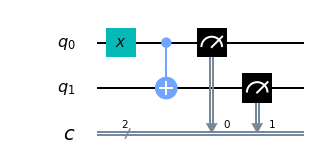

In [8]:
circuit.draw(output = "mpl")

In [3]:
from qiskit import IBMQ

IBMQ.save_account("8ada6764f09d24806b22028994854bd71dbfe6951742bf7cc328bed0e38996b8e30cd3dee8f7d7010dd6406b4709e19b50dbde558cca6314b00a0ad56ed3697a")



Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account() 

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends(): 
    try: 
        qubit_count = len(backend.properties().qubits)
    except: 
        qubit_count = "simulated"
    
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

    
        

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 5 queued and 5 qubits
ibmq_16_melbourne has 8 queued and 14 qubits
ibmq_vigo has 11 queued and 5 qubits
ibmq_ourense has 19 queued and 5 qubits
ibmq_london has 6 queued and 5 qubits
ibmq_burlington has 12 queued and 5 qubits
ibmq_essex has 2 queued and 5 qubits


In [ ]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_qasm_simulator")

job = q.execute(circuit, backend=backend, shots=500)

job_monitor(job)



In [ ]:
from qiskit.visualization import plot_histogram 

result = job.result() 
counts = result.get_counts(circuit)

plot_histogram([counts])

In [ ]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2, 2) # 2 qubits and 2 classical bits

circuit.h(0)

circuit.cx(0,1)

circuit.measure([0,1], [0,1])

circuit.draw()




In [ ]:
job = q.execute(circuit, backend=backend, shots=500)

job_monitor(job)

In [ ]:
result = job.result() 
counts = result.get_counts(circuit)

plot_histogram([counts])

In [ ]:
from qiskit import Aer 

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends(): 
    print(backend)

In [ ]:
job = q.execute(circuit, backend=backend, shots=500)

job_monitor(job)

result = job.result() 
counts = result.get_counts(circuit)

plot_histogram([counts])